In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

import bt_mle_utils as mle
from simulation_utils import *

## Barbell

In [2]:
E = random_edge(5,5,10)
np.sum(E)

10.0

In [3]:
A = get_barbell_adj(n1 = 3, n2 = 5, bridge = 1)
A

array([[0., 1., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 0., 1., 1.],
       [0., 0., 0., 1., 1., 1., 0., 1.],
       [0., 0., 0., 1., 1., 1., 1., 0.]])

In [4]:
n1, n2 = 50, 50
bridge_list = np.arange(50) * 50
lam2_list = []
min_n_ij_list = []
B = 10
for bridge in bridge_list:
    lam, n_ij = 0, 0
    for b in range(B):
        A = get_barbell_adj(n1 = n1, n2 = n2, bridge = bridge)
        lam2, lamn = lambda2_A(A)
        lam += lam2 / B
        n_ij += min_n_ij(A) / B
    lam2_list.append(lam)
    min_n_ij_list.append(n_ij)
lam2_list = np.array(lam2_list)
min_n_ij_list = np.array(min_n_ij_list)

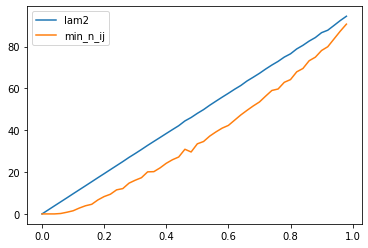

In [5]:
plt.plot(bridge_list / (n1 * n2), lam2_list)
plt.plot(bridge_list / (n1 * n2), min_n_ij_list)
plt.legend(['lam2','min_n_ij'])

In [6]:
t = 0.9
kappa = np.log(t / (1 - t))
kappa

2.1972245773362196

In [7]:
np.exp(4 * kappa)

6561.000000000005

In [8]:
kappa = 2.1
np.exp(kappa) / (1 + np.exp(kappa))

0.8909031788043871

In [62]:
factor = 2
n1, n2 = 50 * factor, 50 * factor
# bridge_list = np.arange(m) * 50
bridge_list = factor**2 * np.array([10, 25, 50, 75, 100, 200, 300, 400, 500, 800, 1200, 1600, 2000, 2400])
m = len(bridge_list)
B = 2

lam2_list = np.zeros(m)
min_n_ij_list = np.zeros(m)
n_max_list = np.zeros(m)
n_min_list = np.zeros(m)

n = n1 + n2
# delta = np.log(n) / n
k = 10
t = 0.9
kappa = np.log(t / (1 - t))
delta = 1
beta = get_beta_with_gap(n, delta)
beta *= kappa / (np.max(beta) - np.min(beta))
total = 1


l_infty_beta_list = np.zeros(m)
std_l_infty_beta_list = np.zeros(m)
bar_l_infty_beta_list = np.zeros((m,2))
rank_beta_list = np.zeros(m)
topk_beta_list = np.zeros(m)

np.random.seed(0)

lam2_list = np.zeros(len(bridge_list))
n_ij_list = np.zeros(len(bridge_list))
n_ratio_list = np.zeros(len(bridge_list))

for ix, bridge in enumerate(bridge_list):
    lam, n_ij = 0, 0
    
    l_infty_beta_, rank_beta_, topk_beta_ = np.zeros(B), np.zeros(B), np.zeros(B)
    lam2_, n_ij_, n_max_, n_min_ = np.zeros(B), np.zeros(B), np.zeros(B), np.zeros(B)
    bound_yan_, bound_shah_, bound_our_ = np.zeros(B), np.zeros(B), np.zeros(B)
    bound_yan_nk_, bound_shah_nk_, bound_our_nk_ = np.zeros(B), np.zeros(B), np.zeros(B)
    
    for b in range(B):
        A = get_barbell_adj(n1 = n1, n2 = n2, bridge = bridge)
        lam2_[b], n_ij_[b], n_max_[b], n_min_[b] = get_topo(A)
    lam2_list[ix] = lam2_.mean()
    n_ij_list[ix] = n_ij_.mean()
    n_ratio_list[ix] = np.mean(n_max_ / n_min_)

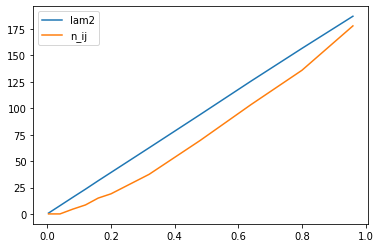

In [63]:
# plt.fill_between(bridge_list / (n1 * n2), l_infty_beta_list - 2*std_l_infty_beta_list, l_infty_beta_list + 2*std_l_infty_beta_list, alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), lam2_list)
plt.plot(bridge_list / (n1 * n2), n_ij_list)
plt.legend(['lam2','n_ij'])
# plt.savefig('barbell-3.pdf')

c:\python\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


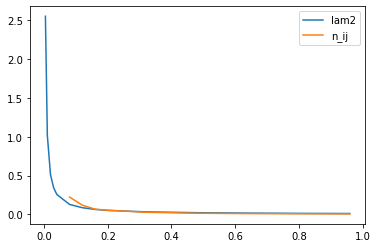

In [66]:
# plt.fill_between(bridge_list / (n1 * n2), l_infty_beta_list - 2*std_l_infty_beta_list, l_infty_beta_list + 2*std_l_infty_beta_list, alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), 2 * 1/lam2_list)
plt.plot(bridge_list / (n1 * n2), 1/n_ij_list)
plt.legend(['lam2','n_ij'])
# plt.savefig('barbell-3.pdf')

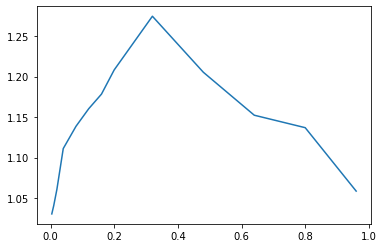

In [64]:
plt.plot(bridge_list / (n1 * n2), n_ratio_list)

In [95]:
np.exp(kappa)

9.000000000000002

In [87]:
factor = 40
n1, n2 = 50 * factor, 50 * factor
# bridge_list = np.arange(m) * 50
bridge_list = factor**2 * np.array([10, 25, 50, 75, 100, 200, 300, 400, 500, 800, 1200, 1600, 2000, 2400])
m = len(bridge_list)
B = 2

lam2_list = np.zeros(m)
min_n_ij_list = np.zeros(m)
n_max_list = np.zeros(m)
n_min_list = np.zeros(m)

bound_yan_list = np.zeros(m)
bound_shah_list = np.zeros(m)
bound_our_list = np.zeros(m)
bound_yan_nk_list = np.zeros(m)
bound_shah_nk_list = np.zeros(m)
bound_our_nk_list = np.zeros(m)

std_yan_list = np.zeros(m)
std_shah_list = np.zeros(m)
std_our_list = np.zeros(m)
std_yan_nk_list = np.zeros(m)
std_shah_nk_list = np.zeros(m)
std_our_nk_list = np.zeros(m)

bar_yan_list = np.zeros((m,2))
bar_shah_list = np.zeros((m,2))
bar_our_list = np.zeros((m,2))
bar_yan_nk_list = np.zeros((m,2))
bar_shah_nk_list = np.zeros((m,2))
bar_our_nk_list = np.zeros((m,2))

n = n1 + n2
# delta = np.log(n) / n
k = 10
t = 0.9
kappa = np.log(t / (1 - t))
delta = 1
beta = get_beta_with_gap(n, delta)
beta *= kappa / (np.max(beta) - np.min(beta))
total = 30


l_infty_beta_list = np.zeros(m)
std_l_infty_beta_list = np.zeros(m)
bar_l_infty_beta_list = np.zeros((m,2))
rank_beta_list = np.zeros(m)
topk_beta_list = np.zeros(m)

np.random.seed(0)

for ix, bridge in enumerate(bridge_list):
    lam, n_ij = 0, 0
    
    l_infty_beta_, rank_beta_, topk_beta_ = np.zeros(B), np.zeros(B), np.zeros(B)
    lam2_, n_ij_, n_max_, n_min_ = np.zeros(B), np.zeros(B), np.zeros(B), np.zeros(B)
    bound_yan_, bound_shah_, bound_our_ = np.zeros(B), np.zeros(B), np.zeros(B)
    bound_yan_nk_, bound_shah_nk_, bound_our_nk_ = np.zeros(B), np.zeros(B), np.zeros(B)
    
    for b in range(B):
        A = get_barbell_adj(n1 = n1, n2 = n2, bridge = bridge)
        lam2_[b], n_ij_[b], n_max_[b], n_min_[b] = get_topo(A)
        
        edge_list = get_edge(A)
        game_matrix = get_game_matrix(beta, edge_list, total)
        
        beta_hat = get_mle_reg(game_matrix)
        l_infty_beta_[b], rank_beta_[b], topk_beta_[b] = get_error(beta, beta_hat, k = k)
        
        L = total
        bound_yan_[b] = get_bound_yan(kappa, n_ij_[b], n, L = total)
        bound_shah_[b] = get_bound_shah(kappa, lam2_[b], n, L = total)
        bound_our_[b] = get_bound_our(kappa, lam2_[b], n_max_[b], n_min_[b], n, L)
        
        bound_yan_nk_[b] = get_bound_yan(kappa, n_ij_[b], n, L = total, no_kappa = True)
        bound_shah_nk_[b] = get_bound_shah(kappa, lam2_[b], n, L = total, no_kappa = True)
        bound_our_nk_[b] = get_bound_our(kappa, lam2_[b], n_max_[b], n_min_[b], n, L, no_kappa = True)
        
        
        
    lam2_list[ix] = np.mean(lam2_)
    min_n_ij_list[ix] = np.mean(n_ij_)
    n_max_list[ix], n_min_list[ix] = np.mean(n_max_), np.mean(n_min_)
    bound_yan_list[ix] = np.mean(bound_yan_)
    bound_shah_list[ix] = np.mean(bound_shah_)
    bound_our_list[ix] = np.mean(bound_our_)
    bound_yan_nk_list[ix] = np.mean(bound_yan_nk_)
    bound_shah_nk_list[ix] = np.mean(bound_shah_nk_)
    bound_our_nk_list[ix] = np.mean(bound_our_nk_)
    
    std_yan_list[ix] = np.std(bound_yan_)
    std_shah_list[ix] = np.std(bound_shah_)
    std_our_list[ix] = np.std(bound_our_)
    std_yan_nk_list[ix] = np.std(bound_yan_nk_)
    std_shah_nk_list[ix] = np.std(bound_shah_nk_)
    std_our_nk_list[ix] = np.std(bound_our_nk_)
    
    bar_yan_list[ix,:] = np.quantile(bound_yan_, 0.05), np.quantile(bound_yan_, 0.95)
    bar_shah_list[ix, :] = np.quantile(bound_shah_, 0.05), np.quantile(bound_shah_, 0.95)
    bar_our_list[ix, :] = np.quantile(bound_our_, 0.05), np.quantile(bound_our_, 0.95)
    bar_yan_nk_list[ix, :] = np.quantile(bound_yan_nk_, 0.05), np.quantile(bound_yan_nk_, 0.95)
    bar_shah_nk_list[ix, :] = np.quantile(bound_shah_nk_, 0.05), np.quantile(bound_shah_nk_, 0.95)
    bar_our_nk_list[ix, :] = np.quantile(bound_our_nk_, 0.05), np.quantile(bound_our_nk_, 0.95)
    
    l_infty_beta_list[ix] = np.mean(l_infty_beta_)
    std_l_infty_beta_list[ix] = np.std(l_infty_beta_)
    bar_l_infty_beta_list[ix, :] = np.quantile(l_infty_beta_, 0.05), np.quantile(l_infty_beta_, 0.95)
    
    rank_beta_list = np.mean(rank_beta_)
    topk_beta_list = np.mean(topk_beta_)    
    
    print(bridge / (n1 * n2))

0.004
0.01
0.02
0.03
0.04
0.08
0.12
0.16
0.2
0.32
0.48
0.64
0.8
0.96


In [88]:
bound_yan_list

array([         inf, 641.34978914, 214.2691341 , 123.99429257,
        87.70125285,  37.4916462 ,  23.26201582,  16.82031258,
        13.32192301,   7.97106816,   5.1105572 ,   3.73971379,
         2.92425218,   2.37568421])

In [89]:
kappa

2.1972245773362196

Text(0, 0.5, 'l-infinity error')

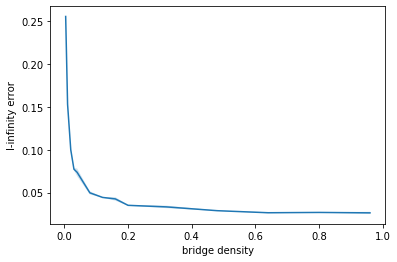

In [90]:
# plt.fill_between(bridge_list / (n1 * n2), l_infty_beta_list - 2*std_l_infty_beta_list, l_infty_beta_list + 2*std_l_infty_beta_list, alpha = 0.2)
plt.fill_between(bridge_list / (n1 * n2), bar_l_infty_beta_list[:,0], bar_l_infty_beta_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), l_infty_beta_list)
plt.xlabel('bridge density')
plt.ylabel('l-infinity error')
# plt.savefig('barbell-3.pdf')

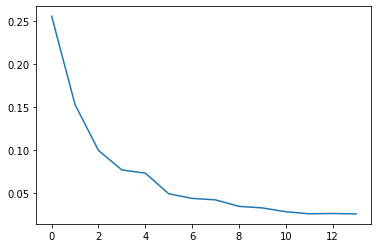

In [91]:
plt.plot(l_infty_beta_list)

Text(0, 0.5, 'l-infinity error')

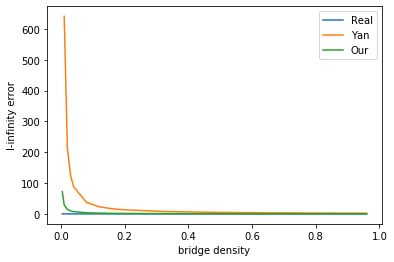

In [92]:
# plt.fill_between(bridge_list / (n1 * n2), l_infty_beta_list - 2*std_l_infty_beta_list, l_infty_beta_list + 2*std_l_infty_beta_list, alpha = 0.2)
plt.fill_between(bridge_list / (n1 * n2), bar_l_infty_beta_list[:,0], bar_l_infty_beta_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), l_infty_beta_list)
plt.fill_between(bridge_list / (n1 * n2), bar_yan_list[:,0], bar_yan_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), bound_yan_list)
# plt.plot(bridge_list / (n1 * n2), bound_shah_list)
plt.fill_between(bridge_list / (n1 * n2), bar_our_list[:,0], bar_our_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), bound_our_list)
# plt.legend(['Real','Yan','Shah','Our'])
plt.legend(['Real','Yan','Our'])
plt.xlabel('bridge density')
plt.ylabel('l-infinity error')
# plt.savefig('barbell-1.pdf')

Text(0, 0.5, 'l-infinity error')

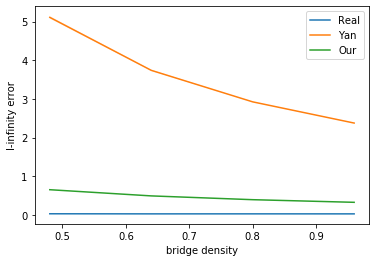

In [93]:
i = 10
# plt.fill_between(bridge_list / (n1 * n2), l_infty_beta_list - 2*std_l_infty_beta_list, l_infty_beta_list + 2*std_l_infty_beta_list, alpha = 0.2)
plt.fill_between(bridge_list[i:] / (n1 * n2), bar_l_infty_beta_list[i:,0], bar_l_infty_beta_list[i:,1], alpha = 0.2)
plt.plot(bridge_list[i:] / (n1 * n2), l_infty_beta_list[i:])
plt.fill_between(bridge_list[i:] / (n1 * n2), bar_yan_list[i:,0], bar_yan_list[i:,1], alpha = 0.2)
plt.plot(bridge_list[i:] / (n1 * n2), bound_yan_list[i:])
# plt.plot(bridge_list / (n1 * n2), bound_shah_list)
plt.fill_between(bridge_list[i:] / (n1 * n2), bar_our_list[i:,0], bar_our_list[i:,1], alpha = 0.2)
plt.plot(bridge_list[i:] / (n1 * n2), bound_our_list[i:])
# plt.legend(['Real','Yan','Shah','Our'])
plt.legend(['Real','Yan','Our'])
plt.xlabel('bridge density')
plt.ylabel('l-infinity error')
# plt.savefig('barbell-2.pdf')

Text(0, 0.5, 'l-infinity error')

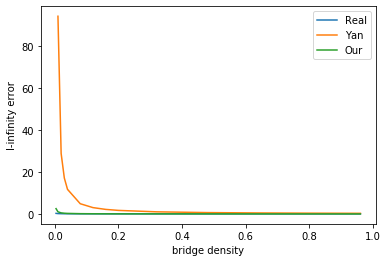

In [85]:
# plt.fill_between(bridge_list / (n1 * n2), l_infty_beta_list - 2*std_l_infty_beta_list, l_infty_beta_list + 2*std_l_infty_beta_list, alpha = 0.2)
plt.fill_between(bridge_list / (n1 * n2), bar_l_infty_beta_list[:,0], bar_l_infty_beta_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), l_infty_beta_list)
plt.fill_between(bridge_list / (n1 * n2), bar_yan_nk_list[:,0], bar_yan_nk_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), bound_yan_nk_list)
# plt.plot(bridge_list / (n1 * n2), bound_shah_list)
plt.fill_between(bridge_list / (n1 * n2), bar_our_nk_list[:,0], bar_our_nk_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), bound_our_nk_list)
# plt.legend(['Real','Yan','Shah','Our'])
plt.legend(['Real','Yan','Our'])
plt.xlabel('bridge density')
plt.ylabel('l-infinity error')
# plt.savefig('barbell-1.pdf')

Text(0, 0.5, 'l-infinity error')

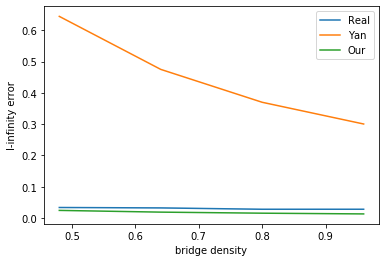

In [86]:
i = 10
# plt.fill_between(bridge_list / (n1 * n2), l_infty_beta_list - 2*std_l_infty_beta_list, l_infty_beta_list + 2*std_l_infty_beta_list, alpha = 0.2)
plt.fill_between(bridge_list[i:] / (n1 * n2), bar_l_infty_beta_list[i:,0], bar_l_infty_beta_list[i:,1], alpha = 0.2)
plt.plot(bridge_list[i:] / (n1 * n2), l_infty_beta_list[i:])
plt.fill_between(bridge_list[i:] / (n1 * n2), bar_yan_nk_list[i:,0], bar_yan_nk_list[i:,1], alpha = 0.2)
plt.plot(bridge_list[i:] / (n1 * n2), bound_yan_nk_list[i:])
# plt.plot(bridge_list / (n1 * n2), bound_shah_list)
plt.fill_between(bridge_list[i:] / (n1 * n2), bar_our_nk_list[i:,0], bar_our_nk_list[i:,1], alpha = 0.2)
plt.plot(bridge_list[i:] / (n1 * n2), bound_our_nk_list[i:])
# plt.legend(['Real','Yan','Shah','Our'])
plt.legend(['Real','Yan','Our'])
plt.xlabel('bridge density')
plt.ylabel('l-infinity error')
# plt.savefig('barbell-2.pdf')

In [97]:
t = 0.7
np.log(t / (1 - t))

0.8472978603872034

In [10]:
factor = 10
n1, n2 = 50 * factor, 50 * factor
# bridge_list = np.arange(m) * 50
bridge_list = factor**2 * np.array([10, 25, 50, 75, 100, 200, 300, 400, 500, 800, 1200, 1600, 2000, 2400])
m = len(bridge_list)
B = 40

lam2_list = np.zeros(m)
min_n_ij_list = np.zeros(m)
n_max_list = np.zeros(m)
n_min_list = np.zeros(m)

bound_yan_list = np.zeros(m)
bound_shah_list = np.zeros(m)
bound_our_list = np.zeros(m)
bound_yan_nk_list = np.zeros(m)
bound_shah_nk_list = np.zeros(m)
bound_our_nk_list = np.zeros(m)

std_yan_list = np.zeros(m)
std_shah_list = np.zeros(m)
std_our_list = np.zeros(m)
std_yan_nk_list = np.zeros(m)
std_shah_nk_list = np.zeros(m)
std_our_nk_list = np.zeros(m)

bar_yan_list = np.zeros((m,2))
bar_shah_list = np.zeros((m,2))
bar_our_list = np.zeros((m,2))
bar_yan_nk_list = np.zeros((m,2))
bar_shah_nk_list = np.zeros((m,2))
bar_our_nk_list = np.zeros((m,2))

n = n1 + n2
# delta = np.log(n) / n
k = 10
t = 0.7
kappa = np.log(t / (1 - t))
delta = 1
beta = get_beta_with_gap(n, delta)
beta *= kappa / (np.max(beta) - np.min(beta))
total = 30


l_infty_beta_list = np.zeros(m)
std_l_infty_beta_list = np.zeros(m)
bar_l_infty_beta_list = np.zeros((m,2))
rank_beta_list = np.zeros(m)
topk_beta_list = np.zeros(m)

np.random.seed(0)

for ix, bridge in enumerate(bridge_list):
    lam, n_ij = 0, 0
    
    l_infty_beta_, rank_beta_, topk_beta_ = np.zeros(B), np.zeros(B), np.zeros(B)
    lam2_, n_ij_, n_max_, n_min_ = np.zeros(B), np.zeros(B), np.zeros(B), np.zeros(B)
    bound_yan_, bound_shah_, bound_our_ = np.zeros(B), np.zeros(B), np.zeros(B)
    bound_yan_nk_, bound_shah_nk_, bound_our_nk_ = np.zeros(B), np.zeros(B), np.zeros(B)
    
    for b in range(B):
        A = get_barbell_adj(n1 = n1, n2 = n2, bridge = bridge)
        lam2_[b], n_ij_[b], n_max_[b], n_min_[b] = get_topo(A)
        
        edge_list = get_edge(A)
        game_matrix = get_game_matrix(beta, edge_list, total)
        
        beta_hat = get_mle_reg(game_matrix)
        l_infty_beta_[b], rank_beta_[b], topk_beta_[b] = get_error(beta, beta_hat, k = k)
        
        L = total
        bound_yan_[b] = get_bound_yan(kappa, n_ij_[b], n, L = total)
        bound_shah_[b] = get_bound_shah(kappa, lam2_[b], n, L = total)
        bound_our_[b] = get_bound_our(kappa, lam2_[b], n_max_[b], n_min_[b], n, L)
        
        bound_yan_nk_[b] = get_bound_yan(kappa, n_ij_[b], n, L = total, no_kappa = True)
        bound_shah_nk_[b] = get_bound_shah(kappa, lam2_[b], n, L = total, no_kappa = True)
        bound_our_nk_[b] = get_bound_our(kappa, lam2_[b], n_max_[b], n_min_[b], n, L, no_kappa = True)
        
        
        
    lam2_list[ix] = np.mean(lam2_)
    min_n_ij_list[ix] = np.mean(n_ij_)
    n_max_list[ix], n_min_list[ix] = np.mean(n_max_), np.mean(n_min_)
    bound_yan_list[ix] = np.mean(bound_yan_)
    bound_shah_list[ix] = np.mean(bound_shah_)
    bound_our_list[ix] = np.mean(bound_our_)
    bound_yan_nk_list[ix] = np.mean(bound_yan_nk_)
    bound_shah_nk_list[ix] = np.mean(bound_shah_nk_)
    bound_our_nk_list[ix] = np.mean(bound_our_nk_)
    
    std_yan_list[ix] = np.std(bound_yan_)
    std_shah_list[ix] = np.std(bound_shah_)
    std_our_list[ix] = np.std(bound_our_)
    std_yan_nk_list[ix] = np.std(bound_yan_nk_)
    std_shah_nk_list[ix] = np.std(bound_shah_nk_)
    std_our_nk_list[ix] = np.std(bound_our_nk_)
    
    bar_yan_list[ix,:] = np.quantile(bound_yan_, 0.05), np.quantile(bound_yan_, 0.95)
    bar_shah_list[ix, :] = np.quantile(bound_shah_, 0.05), np.quantile(bound_shah_, 0.95)
    bar_our_list[ix, :] = np.quantile(bound_our_, 0.05), np.quantile(bound_our_, 0.95)
    bar_yan_nk_list[ix, :] = np.quantile(bound_yan_nk_, 0.05), np.quantile(bound_yan_nk_, 0.95)
    bar_shah_nk_list[ix, :] = np.quantile(bound_shah_nk_, 0.05), np.quantile(bound_shah_nk_, 0.95)
    bar_our_nk_list[ix, :] = np.quantile(bound_our_nk_, 0.05), np.quantile(bound_our_nk_, 0.95)
    
    l_infty_beta_list[ix] = np.mean(l_infty_beta_)
    std_l_infty_beta_list[ix] = np.std(l_infty_beta_)
    bar_l_infty_beta_list[ix, :] = np.quantile(l_infty_beta_, 0.05), np.quantile(l_infty_beta_, 0.95)
    
    rank_beta_list = np.mean(rank_beta_)
    topk_beta_list = np.mean(topk_beta_)    
    
    print(bridge / (n1 * n2))

0.004
0.01
0.02
0.03
0.04
0.08
0.12
0.16
0.2
0.32
0.48
0.64
0.8
0.96


In [24]:
bound_yan_list

array([         inf,          inf, 324.43674427, 109.90100727,
        67.29767926,  23.18418218,  13.65394718,   9.55699989,
         7.20679453,   4.12181803,   2.57508814,   1.85448058,
         1.42909743,   1.143287  ])

In [12]:
kappa

0.8472978603872034

Text(0, 0.5, 'l-infinity error')

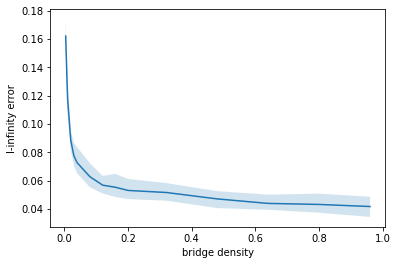

In [13]:
# plt.fill_between(bridge_list / (n1 * n2), l_infty_beta_list - 2*std_l_infty_beta_list, l_infty_beta_list + 2*std_l_infty_beta_list, alpha = 0.2)
plt.fill_between(bridge_list / (n1 * n2), bar_l_infty_beta_list[:,0], bar_l_infty_beta_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), l_infty_beta_list)
plt.xlabel('bridge density')
plt.ylabel('l-infinity error')
# plt.savefig('barbell-3.pdf')

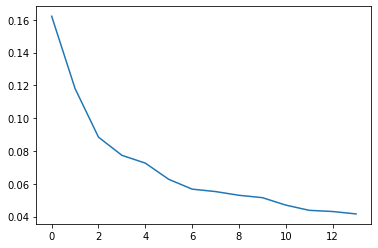

In [14]:
plt.plot(l_infty_beta_list)

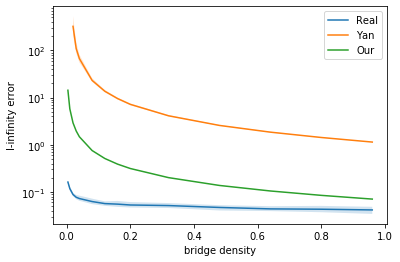

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# plt.fill_between(bridge_list / (n1 * n2), l_infty_beta_list - 2*std_l_infty_beta_list, l_infty_beta_list + 2*std_l_infty_beta_list, alpha = 0.2)
plt.fill_between(bridge_list / (n1 * n2), bar_l_infty_beta_list[:,0], bar_l_infty_beta_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), l_infty_beta_list)
plt.fill_between(bridge_list / (n1 * n2), bar_yan_list[:,0], bar_yan_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), bound_yan_list)
# plt.plot(bridge_list / (n1 * n2), bound_shah_list)
plt.fill_between(bridge_list / (n1 * n2), bar_our_list[:,0], bar_our_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), bound_our_list)

ax.set_yscale('log')
# plt.legend(['Real','Yan','Shah','Our'])
plt.legend(['Real','Yan','Our'])
plt.xlabel('bridge density')
plt.ylabel('l-infinity error')
plt.savefig('barbell-11.pdf', bbox_inches = 'tight')

Text(0, 0.5, 'l-infinity error')

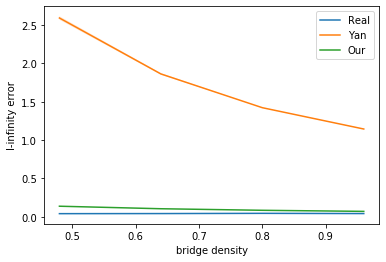

In [104]:
i = 10
# plt.fill_between(bridge_list / (n1 * n2), l_infty_beta_list - 2*std_l_infty_beta_list, l_infty_beta_list + 2*std_l_infty_beta_list, alpha = 0.2)
plt.fill_between(bridge_list[i:] / (n1 * n2), bar_l_infty_beta_list[i:,0], bar_l_infty_beta_list[i:,1], alpha = 0.2)
plt.plot(bridge_list[i:] / (n1 * n2), l_infty_beta_list[i:])
plt.fill_between(bridge_list[i:] / (n1 * n2), bar_yan_list[i:,0], bar_yan_list[i:,1], alpha = 0.2)
plt.plot(bridge_list[i:] / (n1 * n2), bound_yan_list[i:])
# plt.plot(bridge_list / (n1 * n2), bound_shah_list)
plt.fill_between(bridge_list[i:] / (n1 * n2), bar_our_list[i:,0], bar_our_list[i:,1], alpha = 0.2)
plt.plot(bridge_list[i:] / (n1 * n2), bound_our_list[i:])
# plt.legend(['Real','Yan','Shah','Our'])
plt.legend(['Real','Yan','Our'])
plt.xlabel('bridge density')
plt.ylabel('l-infinity error')
# plt.savefig('barbell-2.pdf')

Text(0, 0.5, 'l-infinity error')

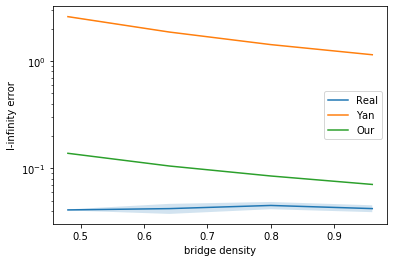

In [105]:
i = 10
# plt.fill_between(bridge_list / (n1 * n2), l_infty_beta_list - 2*std_l_infty_beta_list, l_infty_beta_list + 2*std_l_infty_beta_list, alpha = 0.2)
plt.fill_between(bridge_list[i:] / (n1 * n2), bar_l_infty_beta_list[i:,0], bar_l_infty_beta_list[i:,1], alpha = 0.2)
plt.plot(bridge_list[i:] / (n1 * n2), l_infty_beta_list[i:])
plt.fill_between(bridge_list[i:] / (n1 * n2), bar_yan_list[i:,0], bar_yan_list[i:,1], alpha = 0.2)
plt.plot(bridge_list[i:] / (n1 * n2), bound_yan_list[i:])
# plt.plot(bridge_list / (n1 * n2), bound_shah_list)
plt.fill_between(bridge_list[i:] / (n1 * n2), bar_our_list[i:,0], bar_our_list[i:,1], alpha = 0.2)
plt.plot(bridge_list[i:] / (n1 * n2), bound_our_list[i:])
# plt.legend(['Real','Yan','Shah','Our'])
plt.yscale('log')
plt.legend(['Real','Yan','Our'])
plt.xlabel('bridge density')
plt.ylabel('l-infinity error')
# plt.savefig('barbell-2.pdf')

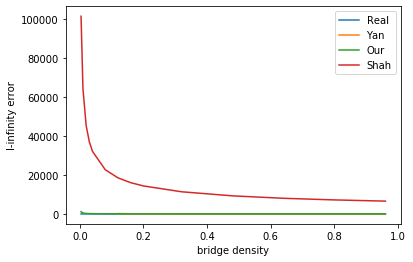

In [5]:
plt.plot(bridge_list / (n1 * n2), l_infty_beta_list)
plt.plot(bridge_list / (n1 * n2), bound_yan_list)
plt.plot(bridge_list / (n1 * n2), bound_our_list)
plt.plot(bridge_list / (n1 * n2), bound_shah_list)
plt.legend(['Real','Yan','Our','Shah'])
plt.xlabel('bridge density')
plt.ylabel('l-infinity error')
plt.savefig('barbell-1-2.pdf')

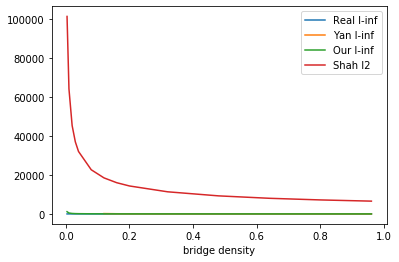

In [32]:
# plt.fill_between(bridge_list / (n1 * n2), l_infty_beta_list - 2*std_l_infty_beta_list, l_infty_beta_list + 2*std_l_infty_beta_list, alpha = 0.2)
plt.fill_between(bridge_list / (n1 * n2), bar_l_infty_beta_list[:,0], bar_l_infty_beta_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), l_infty_beta_list)
plt.fill_between(bridge_list / (n1 * n2), bar_yan_list[:,0], bar_yan_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), bound_yan_list)
plt.fill_between(bridge_list / (n1 * n2), bar_our_list[:,0], bar_our_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), bound_our_list)
plt.fill_between(bridge_list / (n1 * n2), bar_shah_list[:,0], bar_shah_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), bound_shah_list)
plt.legend(['Real l-inf','Yan l-inf','Our l-inf','Shah l2'])
# plt.legend(['Real','Yan','Our'])
plt.xlabel('bridge density')
# plt.ylabel('l-infinity error')
plt.savefig('barbell-1-2.pdf')

In [19]:
# a factor to correct for finite sample values
factor = 1

Text(0.5, 0, 'bridge density')

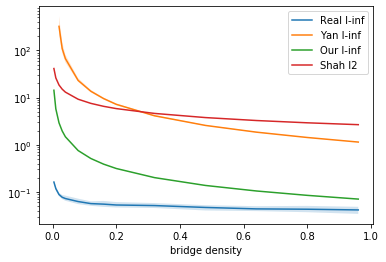

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# plt.fill_between(bridge_list / (n1 * n2), l_infty_beta_list - 2*std_l_infty_beta_list, l_infty_beta_list + 2*std_l_infty_beta_list, alpha = 0.2)
plt.fill_between(bridge_list / (n1 * n2), bar_l_infty_beta_list[:,0], bar_l_infty_beta_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), l_infty_beta_list)
plt.fill_between(bridge_list / (n1 * n2), factor * bar_yan_list[:,0], factor * bar_yan_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), factor * bound_yan_list)
plt.fill_between(bridge_list / (n1 * n2), factor * bar_our_list[:,0], factor * bar_our_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), factor * bound_our_list)
factor_shah = np.exp(2 * kappa)
plt.fill_between(bridge_list / (n1 * n2), factor * bar_shah_nk_list[:,0] * factor_shah, 
                 factor * bar_shah_nk_list[:,1] * factor_shah, alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), factor * bound_shah_nk_list * factor_shah)

ax.set_yscale('log')
plt.legend(['Real l-inf','Yan l-inf','Our l-inf','Shah l2'])
# plt.legend(['Real','Yan','Our'])
plt.xlabel('bridge density')
# plt.ylabel('l-infinity error')
# plt.savefig('barbell-2-2.pdf')

In [53]:
# a factor to correct for finite sample values
factor = 4

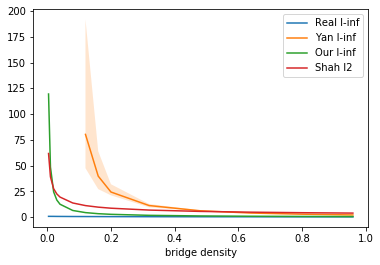

In [56]:
# plt.fill_between(bridge_list / (n1 * n2), l_infty_beta_list - 2*std_l_infty_beta_list, l_infty_beta_list + 2*std_l_infty_beta_list, alpha = 0.2)
plt.fill_between(bridge_list / (n1 * n2), bar_l_infty_beta_list[:,0], bar_l_infty_beta_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), l_infty_beta_list)
plt.fill_between(bridge_list / (n1 * n2), factor * bar_yan_nk_list[:,0], factor * bar_yan_nk_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), factor * bound_yan_nk_list)
plt.fill_between(bridge_list / (n1 * n2), factor * bar_our_nk_list[:,0], factor * bar_our_nk_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), factor * bound_our_nk_list)
plt.fill_between(bridge_list / (n1 * n2), factor * bar_shah_nk_list[:,0], factor * bar_shah_nk_list[:,1], alpha = 0.2)
plt.plot(bridge_list / (n1 * n2), factor * bound_shah_nk_list)
plt.legend(['Real l-inf','Yan l-inf','Our l-inf','Shah l2'])
# plt.legend(['Real','Yan','Our'])
plt.xlabel('bridge density')
# plt.ylabel('l-infinity error')
plt.savefig('barbell-1-3.pdf')

In [25]:
len(bridge_list)

14

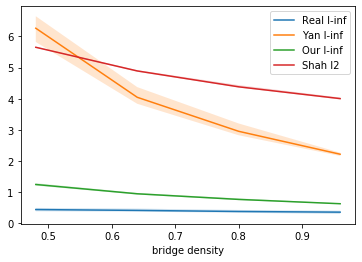

In [55]:
i = 10
# plt.fill_between(bridge_list / (n1 * n2), l_infty_beta_list - 2*std_l_infty_beta_list, l_infty_beta_list + 2*std_l_infty_beta_list, alpha = 0.2)
plt.fill_between(bridge_list[i:] / (n1 * n2), bar_l_infty_beta_list[i:,0], bar_l_infty_beta_list[i:,1], alpha = 0.2)
plt.plot(bridge_list[i:] / (n1 * n2), l_infty_beta_list[i:])
plt.fill_between(bridge_list[i:] / (n1 * n2), factor * bar_yan_nk_list[i:,0], factor * bar_yan_nk_list[i:,1], alpha = 0.2)
plt.plot(bridge_list[i:] / (n1 * n2), factor * bound_yan_nk_list[i:])
plt.fill_between(bridge_list[i:] / (n1 * n2), factor * bar_our_nk_list[i:,0], factor * bar_our_nk_list[i:,1], alpha = 0.2)
plt.plot(bridge_list[i:] / (n1 * n2), factor * bound_our_nk_list[i:])
plt.fill_between(bridge_list[i:] / (n1 * n2), factor * bar_shah_nk_list[i:,0], factor * bar_shah_nk_list[i:,1], alpha = 0.2)
plt.plot(bridge_list[i:] / (n1 * n2), factor * bound_shah_nk_list[i:])
plt.legend(['Real l-inf','Yan l-inf','Our l-inf','Shah l2'])
# plt.legend(['Real','Yan','Our'])
plt.xlabel('bridge density')
# plt.ylabel('l-infinity error')
plt.savefig('barbell-2-3.pdf')

Text(0, 0.5, 'l-infinity error')

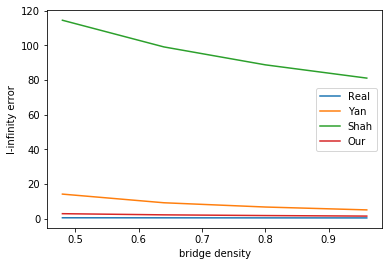

In [11]:
i = 10
plt.plot(bridge_list[i:] / (n1 * n2), l_infty_beta_list[i:])
plt.plot(bridge_list[i:] / (n1 * n2), bound_yan_list[i:])
plt.plot(bridge_list[i:] / (n1 * n2), bound_shah_nk_list[i:] * np.exp(2 * kappa))
plt.plot(bridge_list[i:] / (n1 * n2), bound_our_nk_list[i:] * np.exp(kappa))
plt.legend(['Real l-inf','Yan l-inf','Our l-inf','Shah l2'])
plt.xlabel('bridge density')
# plt.ylabel('l-infinity error')
# plt.savefig('barbell-2.pdf')